<a href="https://colab.research.google.com/github/Zander073/Financial-Derivative-Modeling/blob/main/Binomial_Options_Pricing_Model_Numerical_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import scipy as scp
import scipy.stats as ss
from scipy.integrate import quad
from functools import partial

import matplotlib.pyplot as plt

# **A Brief Introduction to BOPM**
The Binomial Options Pricing Model (BOPM) provides a method of evalutating the price of a security with in a given time period using a discrete-time model. 

Given some time range of $t_{0}$ to $t_{T}$ and a random time step $k$ where $0 \leq k \leq T$, we can estimate a possible value for an options contract at time step $t_{k}$ using the BOPM. 

The main difference between the BOPM and Black-Scholes model is that the Black-Scholes model only allows you to calculate the value of an options contract at the ***end*** of an options' expiration. The BOPM framework allows you to estimate the value of an options contract at anytime **prior** to the options' expiration. 

The way we are able to estimate the value of an option at any future time prior to its expiration is by generating a tree of possible values. Because the premium of an option is based on the spot price of the underlying asset (hence the term derivative), we are able to model possible values of our option contract with the knowledge of the underlying asset's volatility and the options' time to expiration.

# **Generating the BOPM Tree**
It is reasonable at some time step $t_n$, the underlying asset will move up or down by some factor. This is also known as the "up" factor (denoted as $u$) and the "down" factor (denoted at $d$). The probability of the asset moving in one direction may be denoted as $p$ and using the law of total probabilitywe can say the probabiltiy of the asset moving in the opposite direction is $1 - p$. 

Thus, at each node of the tree, we can estimate the value of the underlying asset based on the path one takes on the tree to arrive to that node. 

For example, given that the starting spot price of our underlying asset at $t_0$ is $S_0$, price of our underlying asset at $t_1$ could be $u*S_0$ if the stock goes up or $d*S_0$ if the stock goes down.

The BOPM tree is generated as the following:

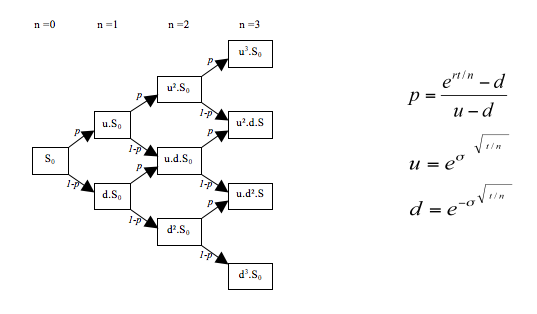

# **Making Sense of the Tree**
There are five main variables used to generate the tree:

1.   $n$ height of the tree.
2.   $u$ up factor.
3.   $d$ down factor.
4.   $p$ probability of a direction.
5.   $T$ options' time to expiration

The height of our tree is important because a tree with too much can get pretty computationally expensive with a worse-case runtime of O($2^n$).

The up and down factors is calculated using the underlying asset's volatility $σ$ and the change in time which is defined as $Δt=\frac{T}{n}$ where:

  $u=e^{\sigma\sqrt{Δt}}$ and $d=e^{-\sigma\sqrt{Δt}}=\frac{1}{u}$




In the following diagram, each node represents the possible value of the underlying asset *not* the possible value of the option contract. 

In [ ]:
# Change in time
def delta_t(T, n):
  return T / n

# Up factor:
def up_factor(sigma, delta_t):
  return math.exp(sigma * np.sqrt(delta_t))

# Down factor:
def down_factor(sigma, delta_t):
  return 1 / up_factor(sigma, delta_t)

# **Probability of Direction**
With the generation of the binomial pricing tree, each node's branch has a probability associated with it such that the probability of going to an upper node ($u$) has a probability of $p$ and going to a lower node ($d$) has a probability of $1-p$ since there are only two possible directions.

$P(u) = p$ and $P(d) = 1-p$

Probability $p$ is *always* referring to the probability of the up factor $u$ and it is defined as:

# $p=\frac{e^{rt/n}-d}{u-d}$

Where;

$r$: Risk-free rate of return

$t$: Time

$n$: Current node in tree

$u$: Up factor

$d$: Down factor